In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
from PIL import Image
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
print(os.listdir('/Users/manojasher/Downloads/emotion detection/train'))
print(os.listdir('/Users/manojasher/Downloads/emotion detection/test'))

['happy', '.DS_Store', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']
['happy', '.DS_Store', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']


In [6]:
# Train Data
path = ('/Users/manojasher/Downloads/emotion detection/train')
neutral_length = len(os.listdir('/Users/manojasher/Downloads/emotion detection/train/neutral'))
happy_length = len(os.listdir('/Users/manojasher/Downloads/emotion detection/train/happy'))
sad_length = len(os.listdir('/Users/manojasher/Downloads/emotion detection/train/sad'))
surprised_length = len(os.listdir('/Users/manojasher/Downloads/emotion detection/train/surprised'))
disgusted_length = len(os.listdir('/Users/manojasher/Downloads/emotion detection/train/disgusted'))
fearful_length = len(os.listdir('/Users/manojasher/Downloads/emotion detection/train/fearful'))
angry_length = len(os.listdir('/Users/manojasher/Downloads/emotion detection/train/angry'))

print('Neutral : ',neutral_length)
print('Happy : ',happy_length)
print('Sad : ',sad_length)
print('surprised: ',surprised_length)
print('disgusted: ',disgusted_length)
print('fearful: ',fearful_length)
print('angry: ',angry_length)

Neutral :  4965
Happy :  7215
Sad :  4830
surprised:  3171
disgusted:  436
fearful:  4097
angry:  3995


In [7]:
#Visualise Data 

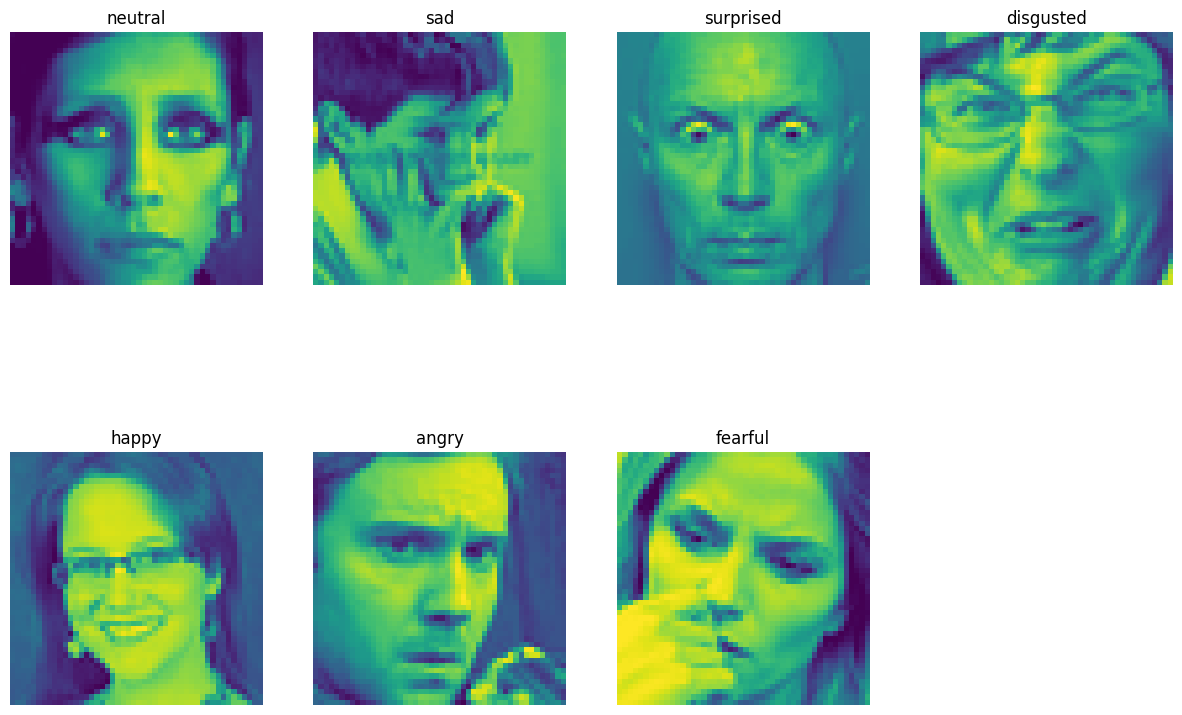

In [8]:
label_name = ['neutral', 'sad', 'surprised', 'disgusted', 'happy', 'angry', 'fearful']
plt.figure(figsize=(15,10))
for i in label_name:
  plt.subplot(2,4,label_name.index(i)+1)
  plt.title(i)
  new_path = os.path.join('/Users/manojasher/Downloads/emotion detection/train',i, 'im0.png')
  plt.imshow(imd.imread(new_path))
  plt.axis('off')
plt.show()

In [9]:
neutral_length_index = [0] * neutral_length
happy_length_index = [1] * happy_length
sad_length_index = [2] * sad_length
surprised_length_index =[3] * surprised_length
disgusted_length_index =[4] * disgusted_length
fearful_length_index =[5] * fearful_length
angry_length_index = [6] * angry_length

In [10]:
label_data = neutral_length_index + happy_length_index + sad_length_index + surprised_length_index + disgusted_length_index + fearful_length_index + angry_length_index

In [11]:
# Try Confirm
sum = 0
for i in label_name:
  sum = sum + label_data.count(label_name.index(i)+1)
print(sum)
len(label_data)

23744


28709

In [12]:
label_name = ['neutral', 'happy', 'sad', 'surprised', 'disgusted', 'fearful', 'angry']

path = '/Users/manojasher/Downloads/emotion detection/train'
data = []
for label in label_name:
  new_path = os.path.join(path, label)
  for img_file in os.listdir(new_path):
    im_path = os.path.join(new_path, img_file)
    image = Image.open(im_path)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [13]:
len(data)

28709

In [14]:
X_train = np.array(data)
from sklearn.preprocessing import OneHotEncoder

label_data = np.array(label_data).reshape(-1, 1)  # Reshape for OneHotEncoder
# The 'sparse' argument is deprecated in newer versions of scikit-learn.
# Use 'sparse_output' instead if you're using a version >= 1.2. 
# For older versions, remove it entirely.
# Assuming you want a dense output:
encoder = OneHotEncoder(sparse_output=False, categories='auto')  
y_train = encoder.fit_transform(label_data)

In [15]:
print(X_train.shape)
print(y_train.shape)

(28709, 128, 128, 3)
(28709, 7)


In [16]:
X_train = X_train/255.0

In [17]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),

    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 858,823 (3.28 MB)

 Trainable params: 858,823 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',  # since we have multiple categories (emotions)
    optimizer='adam',  # Adam optimizer for efficient training
    metrics=['accuracy']  # Accuracy as the evaluation metric
)

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
log_dir = "logs/emotion_detection"
tensorboard = TensorBoard(log_dir=log_dir)


In [20]:
# Split data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [28]:
history = model.fit(
    X_train_split, y_train_split,
    epochs=10,  # You can adjust the number of epochs based on your model's performance
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stopping, tensorboard],
    batch_size=64  # Batch size can be adjusted based on your system's capacity
)

Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 260s 723ms/step - accuracy: 0.2432 - loss: 1.8175 - val_accuracy: 0.2978 - val_loss: 1.7387
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 285s 794ms/step - accuracy: 0.3013 - loss: 1.7222 - val_accuracy: 0.4112 - val_loss: 1.5545
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 278s 774ms/step - accuracy: 0.3777 - loss: 1.5820 - val_accuracy: 0.4296 - val_loss: 1.4792
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 269s 750ms/step - accuracy: 0.4240 - loss: 1.4861 - val_accuracy: 0.4753 - val_loss: 1.3959
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 269s 749ms/step - accuracy: 0.4481 - loss: 1.4230 - val_accuracy: 0.4878 - val_loss: 1.3619
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 269s 749ms/step - accuracy: 0.4662 - loss: 1.3790 - val_accuracy: 0.5057 - val_loss: 1.3125
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 275s 767ms/step - accuracy: 0.4894 - loss: 1.3339 - val_accuracy: 0.5209 - val_loss: 1.2803
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 275s 766ms/step - accuracy: 0.5022 -

In [29]:
# Save the model after training
model.save('my_model.keras')

In [30]:
# Plot the training history
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

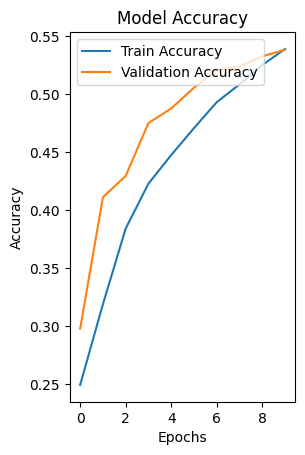

In [31]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

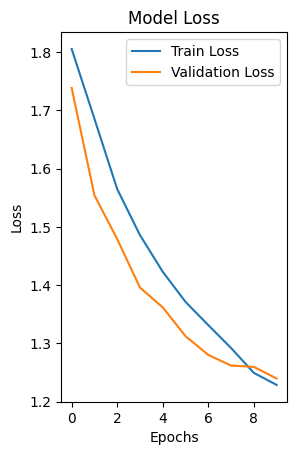

In [32]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [ ]:
plt.tight_layout()
plt.show()